In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import bson
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [11]:
processed_data_path = "/Users/sakshamarora/Documents/6748 Practicum/processed_data"

In [4]:
df_X_2P = pd.read_csv(os.path.join(processed_data_path,"X_2P.csv"))
df_y_2P = pd.read_csv(os.path.join(processed_data_path,"y_2P.csv"))
df_X_3P = pd.read_csv(os.path.join(processed_data_path,"X_3P.csv"))
df_y_3P = pd.read_csv(os.path.join(processed_data_path,"y_3P.csv"))


In [5]:
categorical_features = ['Location', 'Zone','Period','LBA_position', 'year']

# Convert the columns to 'category' type
for col in categorical_features:
    df_X_2P[col] = df_X_2P[col].astype('category')


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_X_2P, df_y_2P, test_size=0.3, random_state=42)

## Fit LightGBM model

In [7]:
categorical_features = ['Location', 'Zone','Period','LBA_position', 'year']
feature_list = X_train.columns.to_numpy()
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100

train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features)
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])
y_train_pred = bst.predict(X_train, num_iteration=bst.best_iteration)
y_test_pred = bst.predict(X_test, num_iteration=bst.best_iteration)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 153427, number of negative: 152002
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.104683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19408
[LightGBM] [Info] Number of data points in the train set: 305429, number of used features: 341
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502333 -> initscore=0.009331
[LightGBM] [Info] Start training from score 0.009331


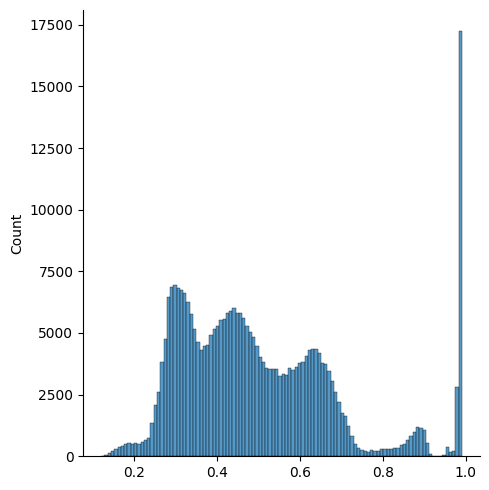

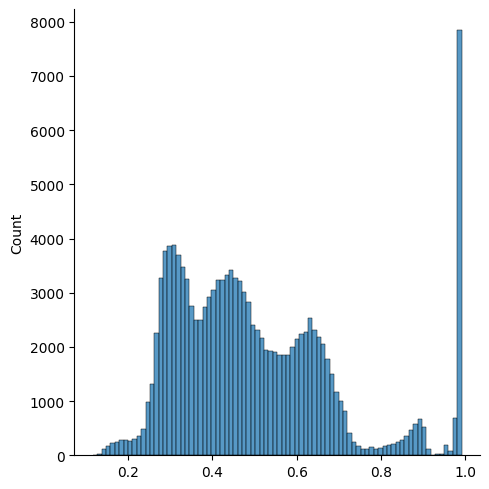

In [29]:
sns.displot(y_train_pred)
sns.displot(y_test_pred)


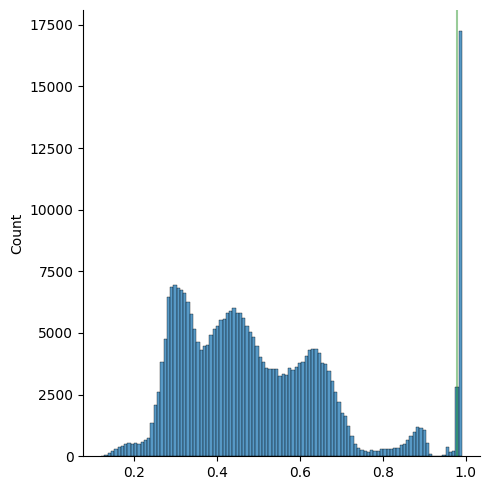

In [34]:
sns.displot(y_train_pred)
plt.axvline(x=0.97,c="green",alpha=0.4)


In [37]:
sum(y_train_pred>=0.97)

20222

In [39]:
X_train.Fastbreak.mean()

0.06875247602552476

In [46]:
X_train.Fastbreak[y_train_pred>=0.97].mean()

1.0

In [45]:
y_train[X_train.Fastbreak].mean(),y_test[X_test.Fastbreak].mean()

(Made    0.990714
 dtype: float64,
 Made    0.991764
 dtype: float64)